In [77]:
from sklearn.manifold import TSNE
from numpy import reshape
import numpy as np
import seaborn as sns
import pandas as pd  
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle
import einops
from numpy import linalg as LA

In [78]:
# https://stackoverflow.com/questions/53968004/how-to-silence-all-sklearn-warning
import warnings
warnings.filterwarnings('ignore') 

In [79]:
import glob
import regex as re

files = glob.glob('../data/mimic3/new_extended_data_unique_embed_*.pickle')
regex = r"new_extended_data_unique_embed_(.*?).pickle"

test_str = " ".join(files)
matches = re.finditer(regex, test_str, re.MULTILINE)

datasets = [match.groups()[0] for match in matches]
datasets.sort()

print(datasets)

dslist = [
 'BERT_chunked_meanpooler_prepro',
 'BioBERT_chunked_meanpooler_prepro',
 'BioELECTRA_chunked_meanpooler_prepro',
 'CliBERT_2m_chunked_meanpooler_prepro',
 'Doc2Vec_prepro',
 'GPT-2_chunked_meanpooler_prepro',
 'PubMedBERT_chunked_meanpooler_prepro',
 'RoBERTa_chunked_meanpooler_prepro',
 'SentenceTransformer_chunked_prepro',
 's2v']

removelist = [d for d in datasets if d not in dslist]

for r in removelist:
    try:
         datasets.remove(r) # CNEP is an old variant, not used anymore
    except:
         pass

datasets

['BERT', 'BERT_', 'BERT_chunked', 'BERT_chunked_meanpooler', 'BERT_chunked_meanpooler_prepro', 'BERT_chunked_nopooler', 'BERT_chunked_pooler', 'BERT_chunked_pooler_prepro', 'BERT_chunked_prepro', 'BERT_large', 'BERT_meanpooler', 'BERT_meanpooler_prepro', 'BERT_pooler', 'BERT_pooler_prepro', 'BERT_prepro', 'BioBERT', 'BioBERT_chunked', 'BioBERT_chunked_meanpooler_prepro', 'BioELECTRA_chunked_meanpooler_prepro', 'CNEP', 'CliBERT_1m', 'CliBERT_1m_chunked', 'CliBERT_2m', 'CliBERT_2m_chunked', 'CliBERT_2m_chunked_meanpooler_prepro', 'CliBERT_2m_chunked_prepro', 'Doc2Vec_', 'Doc2Vec_chunked_prepro', 'Doc2Vec_prepro', 'GPT-2_chunked_meanpooler_prepro', 'GPT2_chunked_meanpooler', 'PubMedBERT_chunked_meanpooler', 'PubMedBERT_chunked_meanpooler_prepro', 'RoBERTa', 'RoBERTa_chunked', 'RoBERTa_chunked_meanpooler_prepro', 'ST_all-mpnet-base-v2', 'ST_distilbert', 'ST_robertabase', 'ST_stsb-mpnet-base-v2', 'SentenceTransformer_chunked_prepro', 'd2v', 's2v', 's2v_chunked', 's2v_plain', 's2v_prepro']


['BERT_chunked_meanpooler_prepro',
 'BioBERT_chunked_meanpooler_prepro',
 'BioELECTRA_chunked_meanpooler_prepro',
 'CliBERT_2m_chunked_meanpooler_prepro',
 'Doc2Vec_prepro',
 'GPT-2_chunked_meanpooler_prepro',
 'PubMedBERT_chunked_meanpooler_prepro',
 'RoBERTa_chunked_meanpooler_prepro',
 'SentenceTransformer_chunked_prepro',
 's2v']

In [80]:
dataset_map2name = {
 'BERT_chunked_meanpooler_prepro': 'BERT',
 'BioBERT_chunked_meanpooler_prepro': 'BioBERT',
 'BioELECTRA_chunked_meanpooler_prepro': 'BioELECTRA',
 'CliBERT_2m_chunked_meanpooler_prepro': 'Clinical BERT, two models',
 'Doc2Vec_prepro': 'Doc2Vec',
 'GPT-2_chunked_meanpooler_prepro': 'GPT-2',
 'PubMedBERT_chunked_meanpooler_prepro': 'PubMedBERT',
 'RoBERTa_chunked_meanpooler_prepro': 'RoBERTa',
 'SentenceTransformer_chunked_prepro': 'Sentence Transformer, basemodel: all-mpnet-base-v2',
 's2v': 'Sent2Vec'}

In [167]:
from pltlatexify import latexify, format_axes

def plot_scatter_with_colorbar(df_, color_palette, tsne=True):
    sns.set(rc={'figure.figsize':(8, 6)})
    latexify(fig_width=8, fig_height=6)
    
    sns_plot = sns.scatterplot(x="comp1", y="comp2", hue=df_.y.tolist(), 
                    # palette=sns.color_palette(color_palette, as_cmap=True),
                    palette=color_palette, # color_palette.N
                    data=df_)
    plottype = 'T-SNE' if tsne else 'UMAP'
    sns_plot.set(title=f"{plottype} projection of MIMIC-III train data notes embeddings, model {dataset_map2name[dataset]}.")

    # norm = plt.Normalize(df_.y.min(), df_.y.max())
    # sm = plt.cm.ScalarMappable(cmap='rocket', norm=norm) # color_palette, norm=norm)
    # sm.set_array([])

    plt.rcParams['axes.grid'] = False
    #sns_plot.set_ylabel('n passengers')
    # sns_plot.get_legend().remove()
    # sns_plot.figure.colorbar(sm, label='Norm')
    
    handles, labels  =  sns_plot.get_legend_handles_labels()
    sns_plot.legend(handles, ['Embeddings Notes', 'Embeddings Events']) #, loc='lower right')
    
    sns_plot.set_xlabel("X component")
    sns_plot.set_ylabel("Y component")
    # sns_plot.set_title("Title")
    plt.tight_layout()
    format_axes(sns_plot)
    plt.show();
    fig = sns_plot.get_figure()
    fig.savefig(f"./plots/{plottype}/plot_{dataset}_{plottype}.pdf") #, bbox_inches='tight', pad_inches = 0)
    
    # fig = sns_plot.get_figure()
    # fig.savefig(f"./plots/{plottype}/plot_{dataset}_{plottype}.png", bbox_inches='tight', pad_inches = 0)


In [168]:
# for dataset in datasets[0:3]:
#     print(dataset)
#     df = pickle.load(open(f'../data/mimic3/new_extended_data_unique_embed_{dataset}.pickle', 'rb'))
#     x1 = df['embeds']
#     x2 = df['embeds_events']
#     # y = df['labels']
#     X = np.concatenate([x1, x2])
#     #y = LA.norm(X, axis=-1)
    
#     distortions = []
#     r = range(1,11)
#     for n in tqdm(r):
#         km = KMeans(n_clusters=n,
#                     init='random',
#                     n_init=10,
#                     max_iter=300,
#                     tol=1e-4,
#                     random_state=4711)
#         km.fit(X)
#         distortions.append(km.inertia_)
                        
#     plt.plot(r, distortions, marker='o')
#     plt.xlabel("Number of clusters")
#     plt.ylabel("Distortion")
#     plt.tight_layout()

# plt.show()

# MIMIC embeddings data T-SNE and UMAP

## Plot all datasets and save plots to file

BERT_chunked_meanpooler_prepro


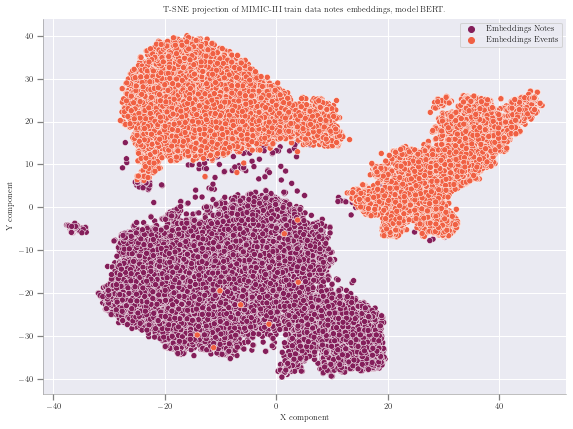

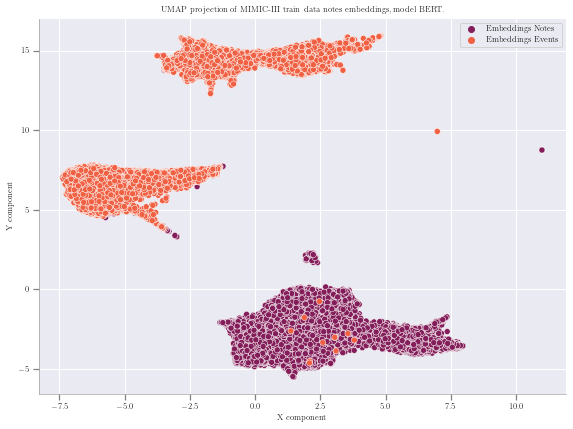

BioBERT_chunked_meanpooler_prepro


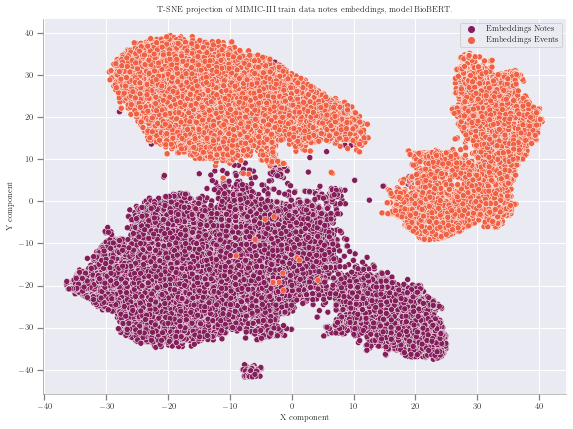

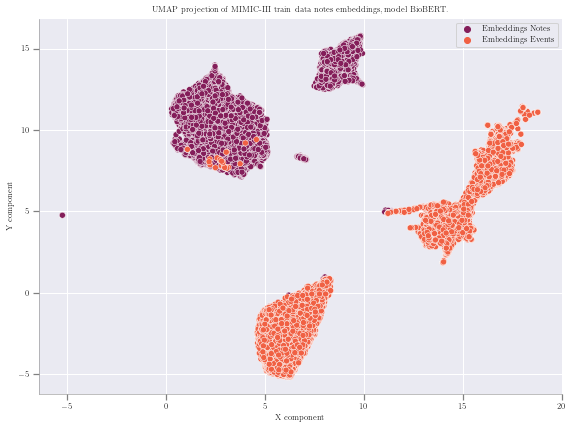

BioELECTRA_chunked_meanpooler_prepro


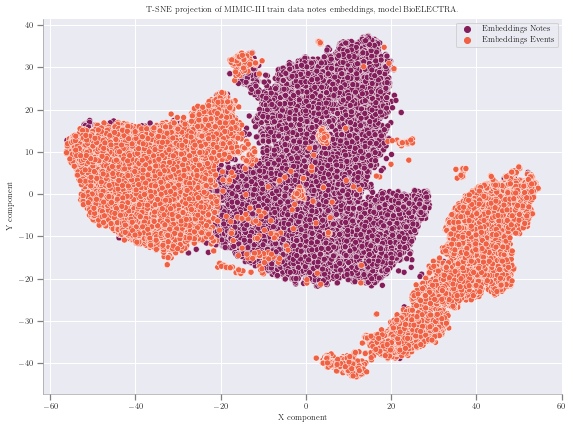

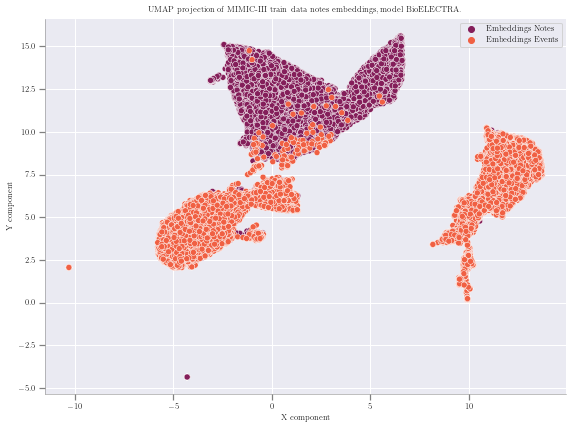

CliBERT_2m_chunked_meanpooler_prepro


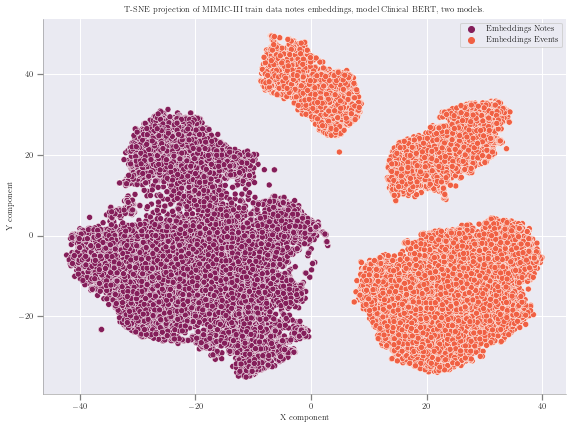

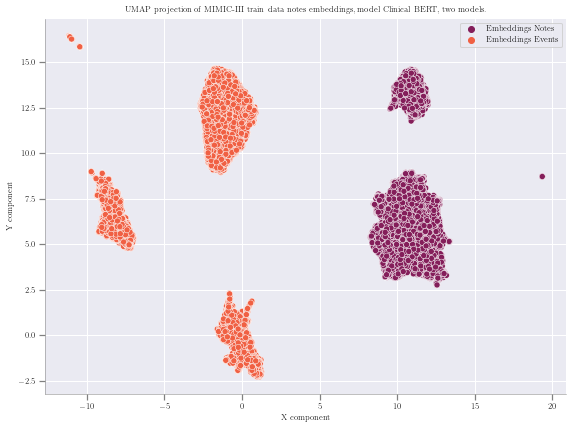

Doc2Vec_prepro


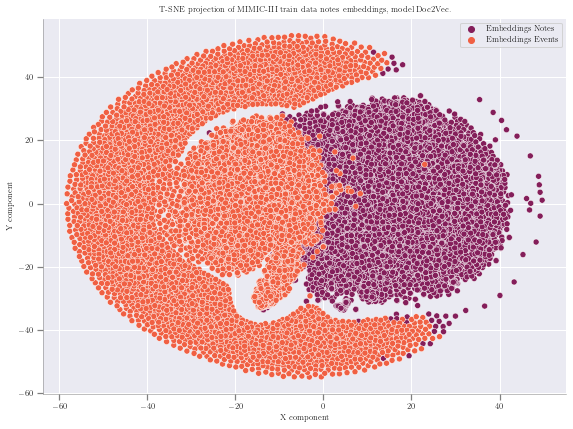

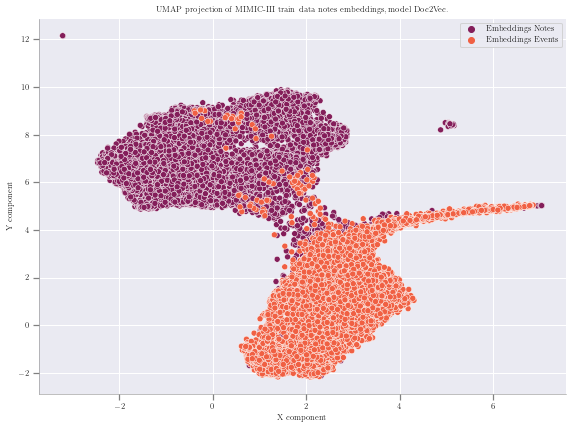

GPT-2_chunked_meanpooler_prepro


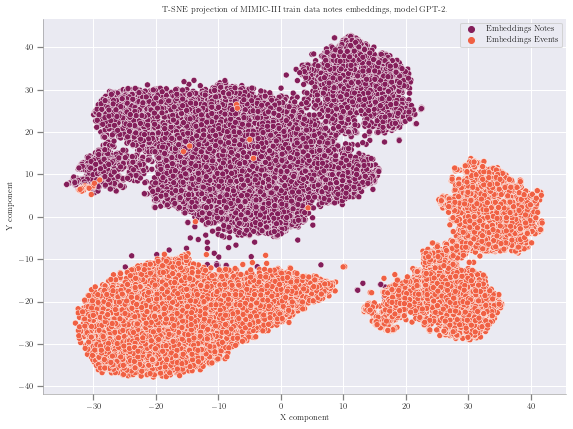

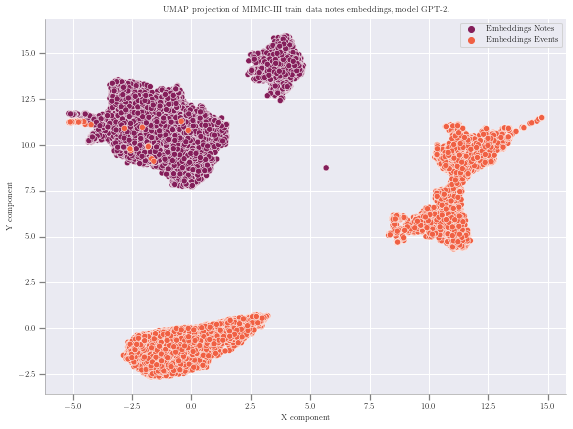

PubMedBERT_chunked_meanpooler_prepro


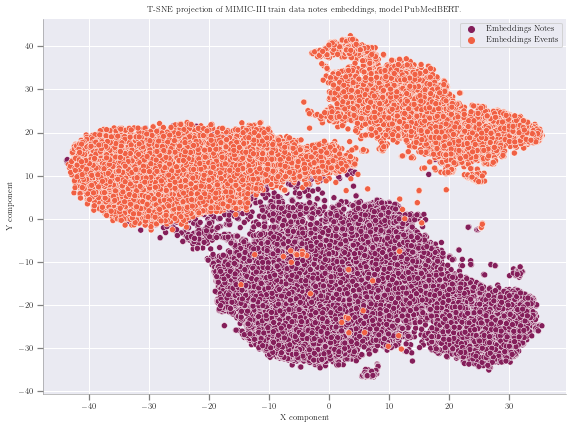

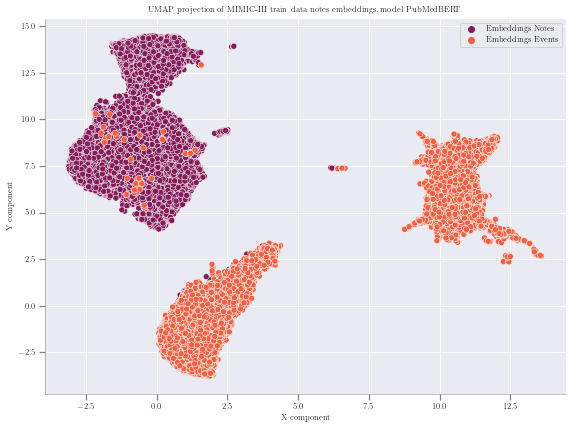

RoBERTa_chunked_meanpooler_prepro


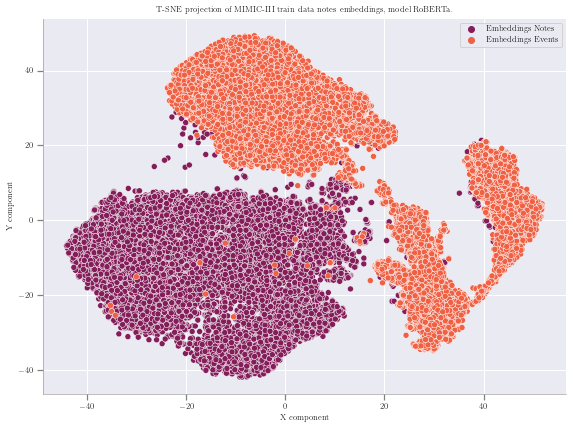

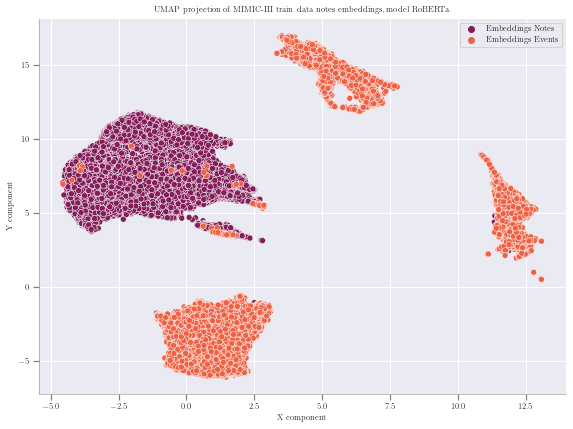

SentenceTransformer_chunked_prepro


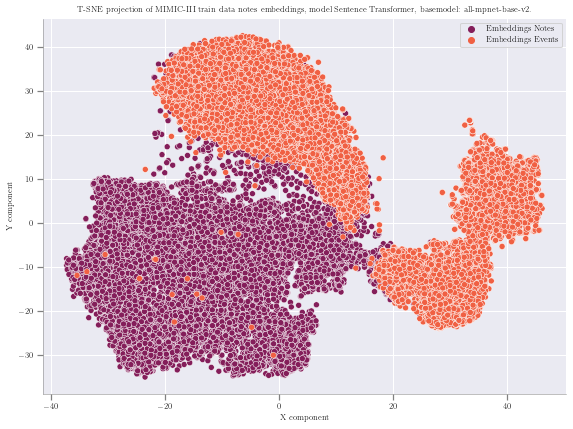

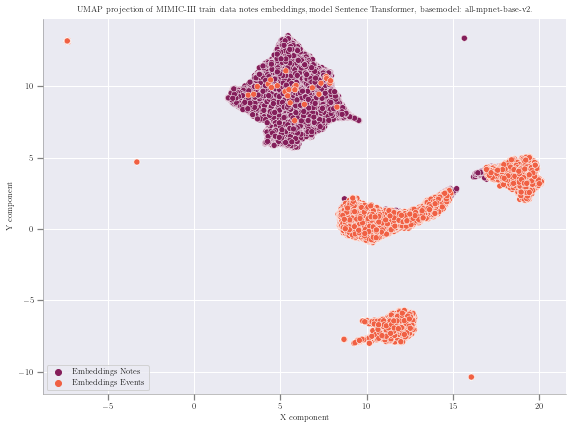

s2v


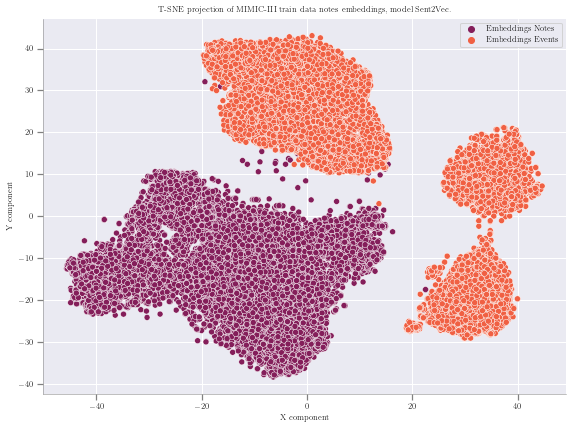

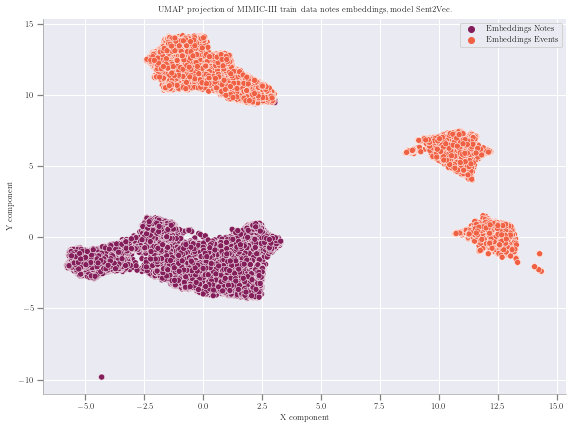

In [170]:
maxn = None
n_clusters = 4

for dataset in datasets:
    print(dataset)
    df = pickle.load(open(f'../data/mimic3/new_extended_data_unique_embed_{dataset}.pickle', 'rb'))
    x1 = df['embeds']
    x2 = df['embeds_events']
    
    y = np.concatenate([np.array([0] * len(x1)), np.array([1] * len(x2))])
    # y = np.concatenate([np.array([0] * (maxn // 2)), np.array([1] * (maxn // 2))])
    y = y.astype(np.float32)
    X = np.concatenate([x1, x2])
    # y = LA.norm(X, axis=-1)
    
    # km = KMeans(n_clusters=n_clusters,
    #                 init='random',
    #                 n_init=10,
    #                 max_iter=300,
    #                 tol=1e-4,
    #                 random_state=4711)
    # y = km.fit_predict(X)

    X = X[:maxn,:]
    y = y[:maxn]
    
    # compute T-SNE projection
    tsne = TSNE(n_components=2, verbose=0, init='pca', perplexity=100, learning_rate=200)
    z = tsne.fit_transform(X)
    
    # compute UMAP projection
    reducer = umap.UMAP(n_components=2, )
    # scaled_X = StandardScaler().fit_transform(X)
    embedding = reducer.fit_transform(X)
    # embedding.shape, X.shape, y.shape
    
    df_ = pd.DataFrame()
    df_["y"] = y
    df_["comp1"] = z[:,0]
    df_["comp2"] = z[:,1]
    # color_palette = 'magma'
    # color_palette = mcolors.ListedColormap(["green", "blue"])
    color_palette=sns.color_palette("rocket", n_colors=len(np.unique(y)))
    # sns.color_palette("rocket", n_colors=2)
   
    plot_scatter_with_colorbar(df_, color_palette, True)
    
    df_["comp1"] = embedding[:,0]
    df_["comp2"] = embedding[:,1]
    
    plot_scatter_with_colorbar(df_, color_palette, False)